# CSE422 GROUP 3 BRAIN STROKE ANALYSIS PROJECT
# Group Member:
# 1.Minhaj Uddin
# 2.Mirza Bushra Tabassum


In [129]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import missingno as msno
import pandas as pd
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,VotingClassifier
from sklearn.metrics import *
from sklearn.model_selection import *
from imblearn.over_sampling import SMOTE


**Reading Database**


In [130]:
database=pd.read_csv('/content/dataset.csv')

**Data Visualization**

In [131]:
print(type(database))
print(database.shape)

<class 'pandas.core.frame.DataFrame'>
(43400, 12)


In [132]:
database.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [133]:
database.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 43400 non-null  int64  
 1   gender             43400 non-null  object 
 2   age                43400 non-null  float64
 3   hypertension       43400 non-null  int64  
 4   heart_disease      43400 non-null  int64  
 5   ever_married       43400 non-null  object 
 6   work_type          43400 non-null  object 
 7   Residence_type     43400 non-null  object 
 8   avg_glucose_level  43400 non-null  float64
 9   bmi                41938 non-null  float64
 10  smoking_status     30108 non-null  object 
 11  stroke             43400 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 4.0+ MB


**Removing id column**

In [134]:
database=database.drop(['id'],axis=1)
database.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             43400 non-null  object 
 1   age                43400 non-null  float64
 2   hypertension       43400 non-null  int64  
 3   heart_disease      43400 non-null  int64  
 4   ever_married       43400 non-null  object 
 5   work_type          43400 non-null  object 
 6   Residence_type     43400 non-null  object 
 7   avg_glucose_level  43400 non-null  float64
 8   bmi                41938 non-null  float64
 9   smoking_status     30108 non-null  object 
 10  stroke             43400 non-null  int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 3.6+ MB


In [135]:
database.shape

(43400, 11)

In [136]:
database.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,43400.000000,43400.000000,43400.000000,43400.000000,41938.000000,43400.000000
mean,42.217894,0.093571,0.047512,104.482750,28.605038,0.018041
std,22.519649,0.291235,0.212733,43.111751,7.770020,0.133103
min,0.080000,0.000000,0.000000,55.000000,10.100000,0.000000
25%,24.000000,0.000000,0.000000,77.540000,23.200000,0.000000
50%,44.000000,0.000000,0.000000,91.580000,27.700000,0.000000
75%,60.000000,0.000000,0.000000,112.070000,32.900000,0.000000
max,82.000000,1.000000,1.000000,291.050000,97.600000,1.000000


**Counting Missing Values**


In [137]:
missing_values_count = database.isnull().sum()

print("Missing Values Count:")
print(missing_values_count)

Missing Values Count:
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64


**Visualize Missing Vlues**

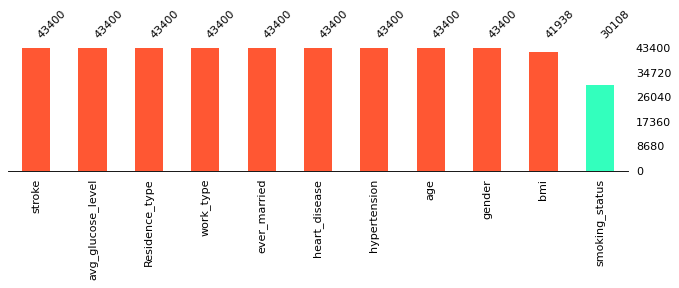

In [138]:
import missingno as msno
missing_value_color='#FF5733'
other_color='#33FFBD'

#defining color
color=[missing_value_color]*10+[other_color]

#creating a new figure and axes
fig,ax=plt.subplots(figsize=(10,2),dpi=80)
fig.patch.set_facecolor('#ffffff')
ax.set_facecolor('#ffffff')

#creating the missing bar plot
msno.bar(database,sort='descending',color=color,ax=ax,fontsize=10,labels='off',filter='top')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='center', size=10, weight='normal',  alpha=1)
ax.set_yticklabels('')
ax.spines['bottom'].set_visible(True)
plt.show()

In [139]:
database[['bmi']]

,bmi
0,18.0
1,39.2
2,17.6
3,35.9
4,19.1
...,...
43395,20.4
43396,55.4
43397,28.9
43398,33.2


**Imputing in BMI**

In [140]:
impute=SimpleImputer(missing_values=np.NaN,strategy='mean')
impute.fit(database[['bmi']])

database['bmi']=impute.transform(database[['bmi']])

**Checking Null value for Bmi**

In [141]:
database.isnull().sum()

gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                      0
smoking_status       13292
stroke                   0
dtype: int64

In [142]:
database[['smoking_status']]


,smoking_status
0,NaN
1,never smoked
2,NaN
3,formerly smoked
4,NaN
...,...
43395,never smoked
43396,formerly smoked
43397,formerly smoked
43398,never smoked


In [143]:
database.count()

gender               43400
age                  43400
hypertension         43400
heart_disease        43400
ever_married         43400
work_type            43400
Residence_type       43400
avg_glucose_level    43400
bmi                  43400
smoking_status       30108
stroke               43400
dtype: int64

**Catagorical Features**

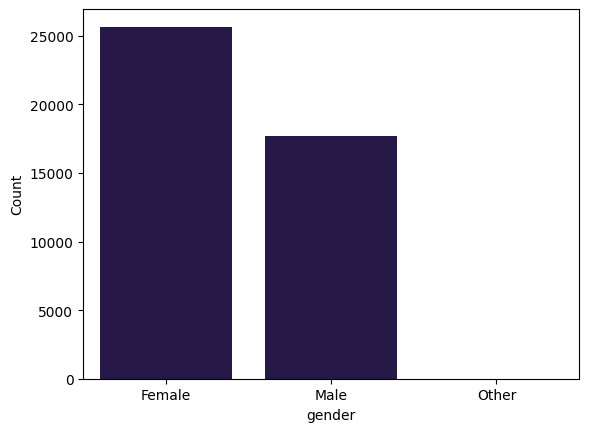

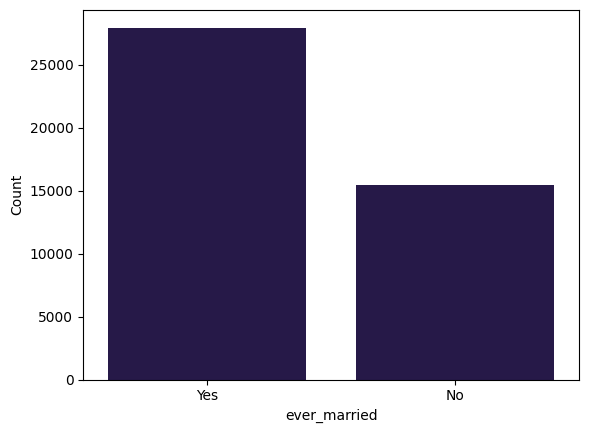

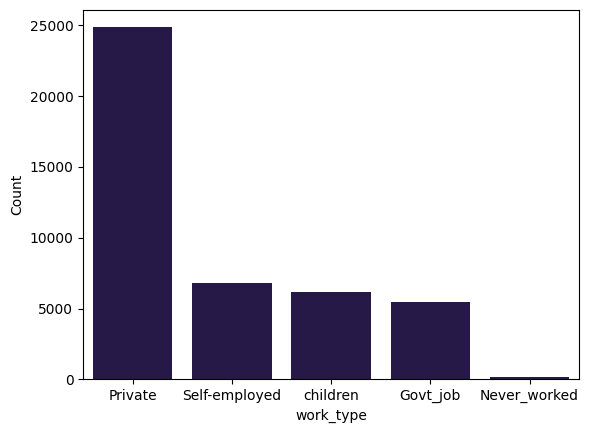

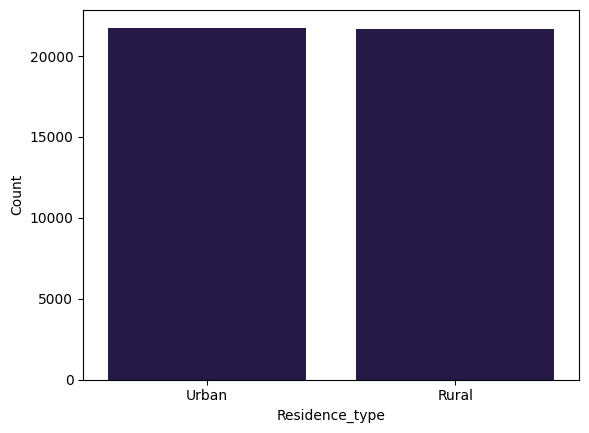

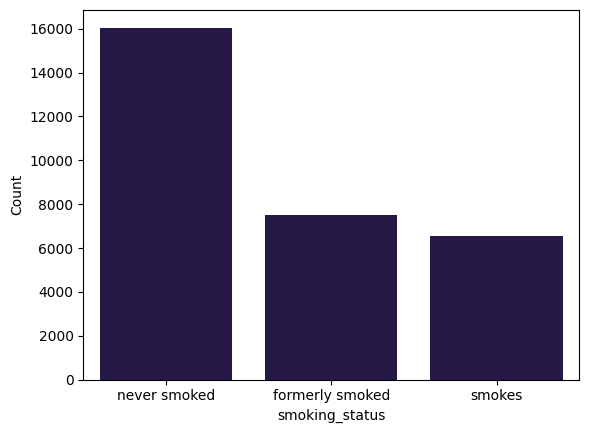

In [144]:
category_columns=database.select_dtypes(include=['object'])
sns.set_palette('magma')

for column in category_columns:
  sns.countplot(data=database,x=column,order=database[column].value_counts().index)
  plt.xlabel(column)
  plt.ylabel('Count')
  plt.show()

**Feature Engineering**

In [145]:
database['work_type'].value_counts()

work_type
Private          24834
Self-employed     6793
children          6156
Govt_job          5440
Never_worked       177
Name: count, dtype: int64

In [146]:
database['work_type'].unique()

array(['children', 'Private', 'Never_worked', 'Self-employed', 'Govt_job'],
      dtype=object)

In [147]:
database=pd.get_dummies(database,columns=['work_type']) #convert to binary

In [148]:
database['gender'].value_counts()

gender
Female    25665
Male      17724
Other        11
Name: count, dtype: int64

In [149]:
database['gender'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [150]:
database['gender']=database['gender'].map({'Male':1,'Female':0}) #convert to binary

In [151]:
database['gender'].head()

0    1.0
1    1.0
2    0.0
3    0.0
4    1.0
Name: gender, dtype: float64

In [152]:
database.count()

gender                     43389
age                        43400
hypertension               43400
heart_disease              43400
ever_married               43400
Residence_type             43400
avg_glucose_level          43400
bmi                        43400
smoking_status             30108
stroke                     43400
work_type_Govt_job         43400
work_type_Never_worked     43400
work_type_Private          43400
work_type_Self-employed    43400
work_type_children         43400
dtype: int64

In [153]:
database['gender'].mean()

0.40849063126598906

In [154]:
database["gender"].fillna(database["gender"].mean(), inplace=True)

In [155]:
database['ever_married'].unique()

array(['No', 'Yes'], dtype=object)

In [156]:
database["ever_married"]=database["ever_married"].map({"Yes":1,"No":0})

In [157]:
database["ever_married"].head()

0    0
1    1
2    0
3    1
4    0
Name: ever_married, dtype: int64

In [158]:
database['Residence_type'].unique()

array(['Rural', 'Urban'], dtype=object)

In [159]:
database["Residence_type"]=database["Residence_type"].map({"Urban":1,"Rural":0})

In [160]:
database['Residence_type'].head()

0    0
1    1
2    1
3    0
4    0
Name: Residence_type, dtype: int64

In [161]:
database['smoking_status'].unique()

array([nan, 'never smoked', 'formerly smoked', 'smokes'], dtype=object)

In [162]:
database = pd.get_dummies(database,columns=["smoking_status"])

In [163]:
database.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1.0,3.0,0,0,0,0,95.12,18.0,0,False,False,False,False,True,False,False,False
1,1.0,58.0,1,0,1,1,87.96,39.2,0,False,False,True,False,False,False,True,False
2,0.0,8.0,0,0,0,1,110.89,17.6,0,False,False,True,False,False,False,False,False
3,0.0,70.0,0,0,1,0,69.04,35.9,0,False,False,True,False,False,True,False,False
4,1.0,14.0,0,0,0,0,161.28,19.1,0,False,True,False,False,False,False,False,False


In [164]:
database.count()

gender                            43400
age                               43400
hypertension                      43400
heart_disease                     43400
ever_married                      43400
Residence_type                    43400
avg_glucose_level                 43400
bmi                               43400
stroke                            43400
work_type_Govt_job                43400
work_type_Never_worked            43400
work_type_Private                 43400
work_type_Self-employed           43400
work_type_children                43400
smoking_status_formerly smoked    43400
smoking_status_never smoked       43400
smoking_status_smokes             43400
dtype: int64

**Checking any other Null Value Exist**

In [165]:
database.isnull().sum()

gender                            0
age                               0
hypertension                      0
heart_disease                     0
ever_married                      0
Residence_type                    0
avg_glucose_level                 0
bmi                               0
stroke                            0
work_type_Govt_job                0
work_type_Never_worked            0
work_type_Private                 0
work_type_Self-employed           0
work_type_children                0
smoking_status_formerly smoked    0
smoking_status_never smoked       0
smoking_status_smokes             0
dtype: int64

**Selection**

In [166]:
correlation=database.corr()
correlation

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
gender,1.000000,-0.027674,0.024004,0.082353,-0.031068,0.001586,0.035813,-0.021551,0.011324,-0.013503,0.002720,-0.052077,-0.002823,0.089108,0.038655,-0.104262,0.026159
age,-0.027674,1.000000,0.272169,0.250188,0.693070,0.001299,0.237627,0.352236,0.156049,0.115651,-0.069509,0.143657,0.326913,-0.641240,0.244646,0.113898,0.080043
hypertension,0.024004,0.272169,1.000000,0.119777,0.176575,-0.003124,0.160211,0.153779,0.075332,0.020065,-0.019319,0.007236,0.100243,-0.130171,0.071775,0.040298,0.026940
heart_disease,0.082353,0.250188,0.119777,1.000000,0.128833,-0.002743,0.146938,0.054133,0.113763,-0.002441,-0.014292,-0.006327,0.099342,-0.089559,0.083395,-0.035606,0.034839
ever_married,-0.031068,0.693070,0.176575,0.128833,1.000000,0.004422,0.153607,0.337517,0.071920,0.135298,-0.080734,0.158857,0.199305,-0.546495,0.172053,0.103365,0.104869
Residence_type,0.001586,0.001299,-0.003124,-0.002743,0.004422,1.000000,0.000014,-0.003685,0.002247,-0.000142,0.003089,0.006050,-0.007136,-0.001578,-0.004288,0.000075,0.008687
avg_glucose_level,0.035813,0.237627,0.160211,0.146938,0.153607,0.000014,1.000000,0.184199,0.078917,0.023014,-0.014516,0.008048,0.080246,-0.114174,0.075054,0.012246,0.025871
bmi,-0.021551,0.352236,0.153779,0.054133,0.337517,-0.003685,0.184199,1.000000,0.018407,0.093567,-0.021608,0.200884,0.081757,-0.454870,0.119270,0.116958,0.071319
stroke,0.011324,0.156049,0.075332,0.113763,0.071920,0.002247,0.078917,0.018407,1.000000,-0.004782,-0.008674,-0.002464,0.061195,-0.054115,0.039306,-0.002015,0.007061
work_type_Govt_job,-0.013503,0.115651,0.020065,-0.002441,0.135298,-0.000142,0.023014,0.093567,-0.004782,1.000000,-0.024225,-0.437825,-0.163074,-0.153907,0.027947,0.040191,0.027483


<Axes: >

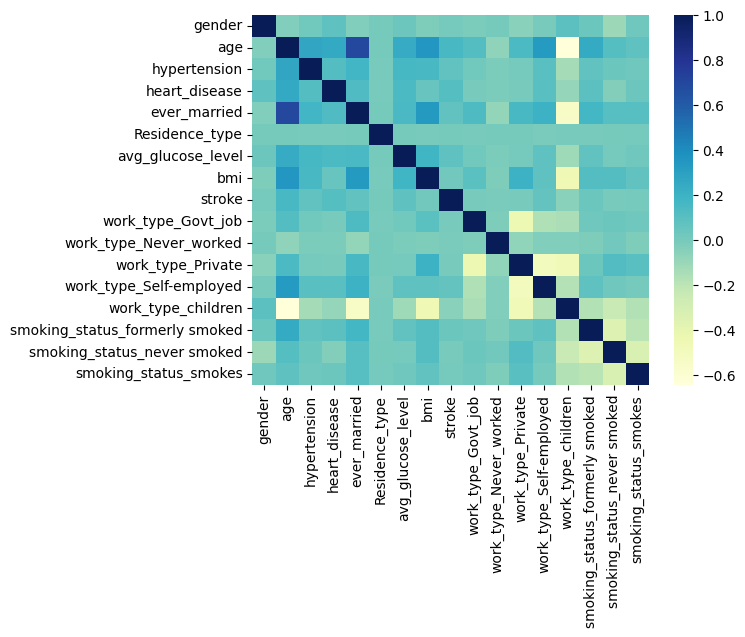

In [167]:
sns.heatmap(correlation,cmap='YlGnBu')

**Spliting**

In [168]:
print("Keys of Dataset:\n",database.keys())

Keys of Dataset:
 Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'Residence_type', 'avg_glucose_level', 'bmi', 'stroke',
       'work_type_Govt_job', 'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes'],
      dtype='object')


In [169]:
y=database['stroke']
x=database.drop(['stroke'],axis=1)
x.keys()

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'Residence_type', 'avg_glucose_level', 'bmi', 'work_type_Govt_job',
       'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes'],
      dtype='object')

In [170]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=.30,random_state=0,stratify=y)

In [171]:
print("X_Train Shape :",X_train.shape)
print("Y_train Shape :",Y_train.shape)

X_Train Shape : (30380, 16)
Y_train Shape : (30380,)


In [172]:
print("X_test Shape :",X_test.shape)
print("Y_test Shape :",Y_test.shape)

X_test Shape : (13020, 16)
Y_test Shape : (13020,)


In [173]:
print(Y_train.dtypes)
print(Y_train.unique())


int64
[0 1]


In [174]:
stroke_dataframe=pd.DataFrame(X_train,columns=x.keys())

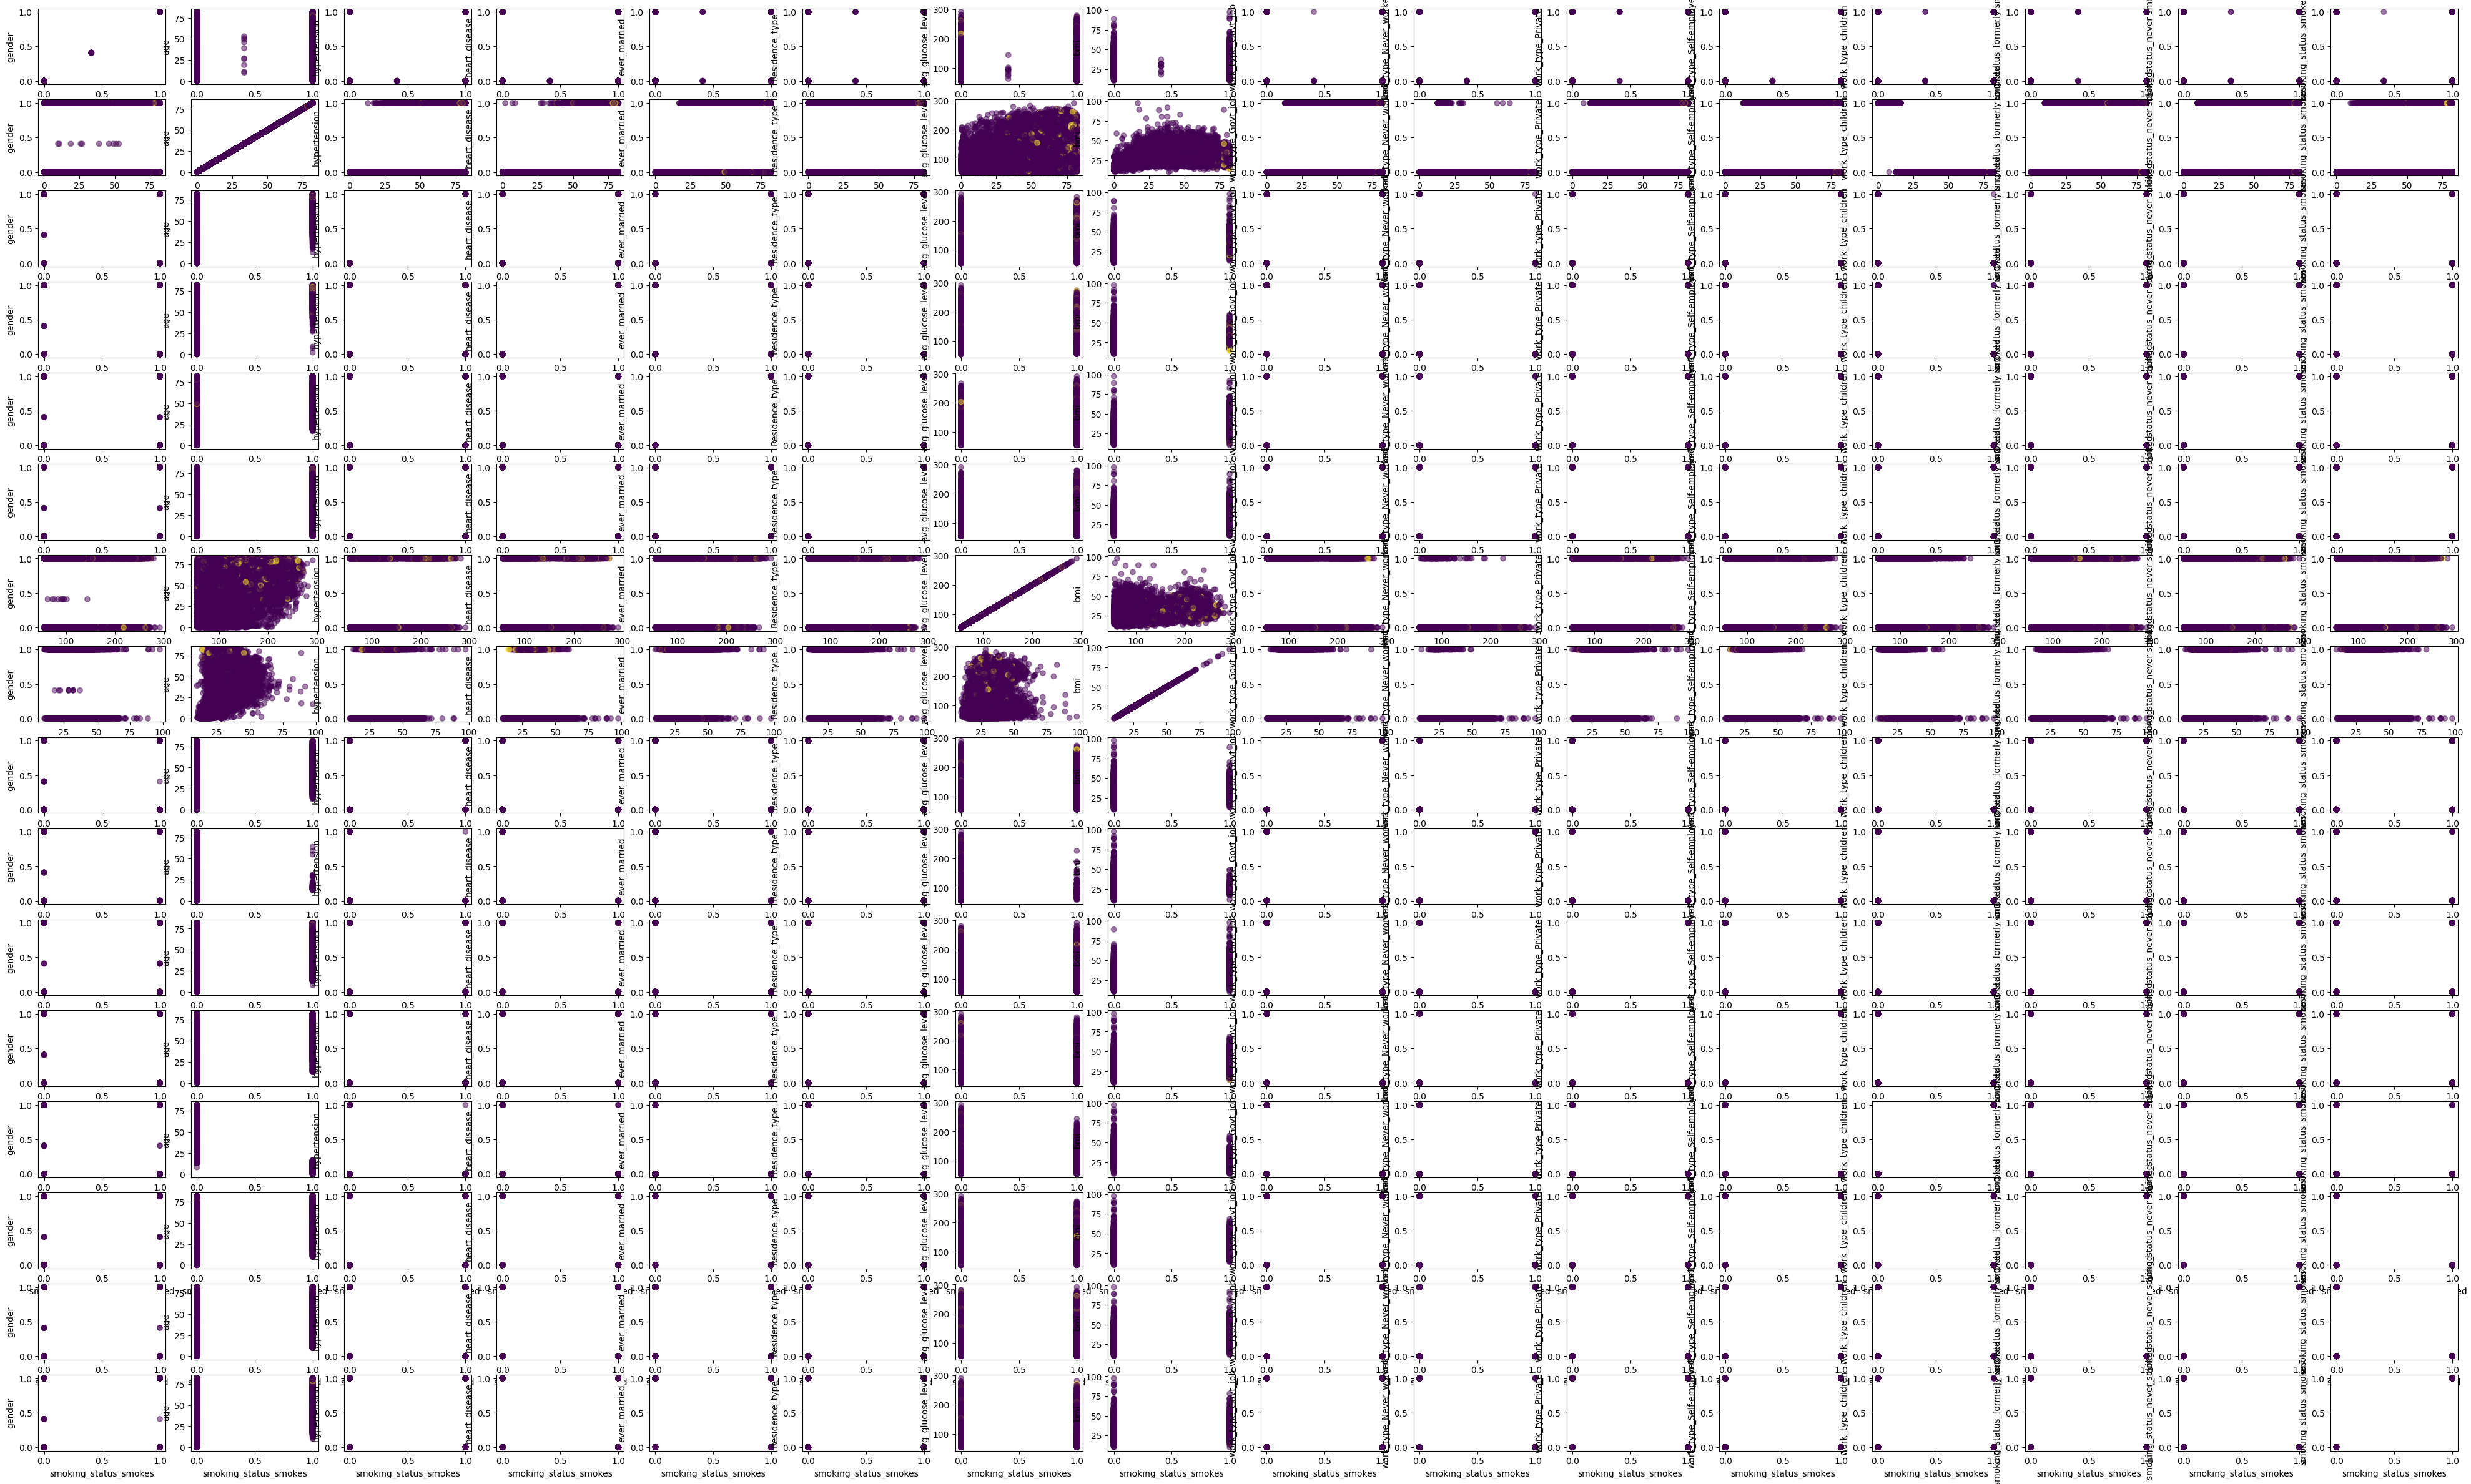

In [175]:
import numpy as np
import matplotlib.pyplot as plt

# Create a scatter plot matrix
fig, axes = plt.subplots(nrows=len(stroke_dataframe.columns), ncols=len(stroke_dataframe.columns),
                         figsize=(50, 30))
Y_train_array = np.array(Y_train)

# Set the marker style
marker = 'o'

# Iterate over each pair of columns and create scatter plots
for i, col1 in enumerate(stroke_dataframe.columns):
    for j, col2 in enumerate(stroke_dataframe.columns):
        axes[i, j].scatter(stroke_dataframe[col1], stroke_dataframe[col2], c=Y_train_array,
                           marker=marker, alpha=0.5)
        axes[i, j].set_xlabel(col1)
        axes[i, j].set_ylabel(col2)

plt.show()


Text(0, 0.5, 'no of strokes')

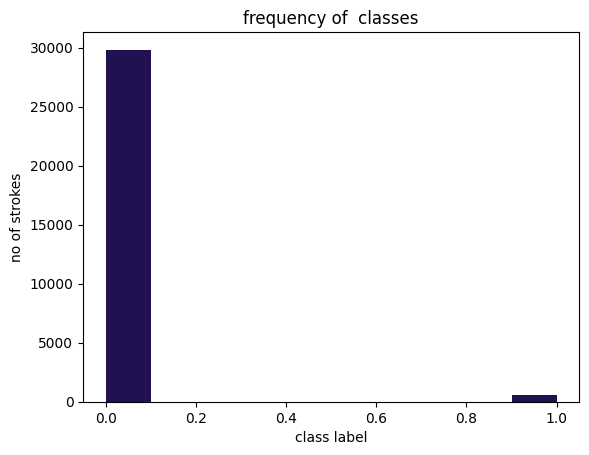

In [176]:
fig,ax = plt.subplots()
ax.hist(Y_train)
ax.set_title('frequency of  classes')
ax.set_xlabel('class label')
ax.set_ylabel('no of strokes')

**Scaling**

In [177]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler()

In [178]:
X_train_scaler=scaler.transform(X_train)
print("per-feature minimum before scaling:\n {}".format(X_train.min(axis=0)))
print("per-feature maximum before scaling:\n {}".format(X_train.max(axis=0)))

per-feature minimum before scaling:
 gender                              0.0
age                                0.08
hypertension                          0
heart_disease                         0
ever_married                          0
Residence_type                        0
avg_glucose_level                  55.0
bmi                                10.1
work_type_Govt_job                False
work_type_Never_worked            False
work_type_Private                 False
work_type_Self-employed           False
work_type_children                False
smoking_status_formerly smoked    False
smoking_status_never smoked       False
smoking_status_smokes             False
dtype: object
per-feature maximum before scaling:
 gender                               1.0
age                                 82.0
hypertension                           1
heart_disease                          1
ever_married                           1
Residence_type                         1
avg_glucose_level         

In [179]:
print("per-feature minimum after scaling:\n{}".format(X_train_scaler.min(axis=0)))
print("per-feature maximum after scaling:\n{}".format(X_train_scaler.max(axis=0)))

per-feature minimum after scaling:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
per-feature maximum after scaling:
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [180]:
X_test_scaler=scaler.transform(X_test)
print("per-feature minimum before scaling:\n {}".format(X_test.min(axis=0)))
print("per-feature maximum before scaling:\n {}".format(X_test.max(axis=0)))

per-feature minimum before scaling:
 gender                              0.0
age                                0.08
hypertension                          0
heart_disease                         0
ever_married                          0
Residence_type                        0
avg_glucose_level                 55.01
bmi                                10.3
work_type_Govt_job                False
work_type_Never_worked            False
work_type_Private                 False
work_type_Self-employed           False
work_type_children                False
smoking_status_formerly smoked    False
smoking_status_never smoked       False
smoking_status_smokes             False
dtype: object
per-feature maximum before scaling:
 gender                               1.0
age                                 82.0
hypertension                           1
heart_disease                          1
ever_married                           1
Residence_type                         1
avg_glucose_level         

In [181]:
print("per-feature minimum after scaling:\n{}".format(X_test_scaler.min(axis=0)))
print("per-feature maximum after scaling:\n{}".format(X_test_scaler.max(axis=0)))

per-feature minimum after scaling:
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 4.23639060e-05 2.28571429e-03
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
per-feature maximum after scaling:
[1.         1.         1.         1.         1.         1.
 0.95818682 0.98285714 1.         1.         1.         1.
 1.         1.         1.         1.        ]


In [182]:
from sklearn.neighbors import KNeighborsClassifier
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=.30,random_state=0,stratify=y)
knn=KNeighborsClassifier()
knn.fit(X_train,Y_train)
scaler=MinMaxScaler()
scaler.fit(X_train)
X_train_scaler=scaler.transform(X_train)
X_test_scaler=scaler.transform(X_test)

knn.fit(X_train_scaler,Y_train)
print("Scaled test set accuracy: {:.2f}".format(knn.score(X_test_scaler, Y_test)))


Scaled test set accuracy: 0.98


**Cross Validation**

In [183]:
# Logistic Regression
model1 = LogisticRegression(solver="liblinear")
lr_accuracy = cross_val_score(model1, x, y, cv=10, scoring='accuracy').mean()
print("Logistic Regression Accuracy:", lr_accuracy)
#Decision tree
model2 = DecisionTreeClassifier()
dt_accuracy = cross_val_score(model2, x, y, cv=10, scoring='accuracy').mean()
print("Decision Tree Accuracy:", dt_accuracy)

#Random Forest
model3 = RandomForestClassifier()
rf_accuracy = cross_val_score(model3, x, y, cv=10, scoring='accuracy').mean()
print("Random Forest Accuracy:", rf_accuracy)

#Gradient Boosting
model4 = GradientBoostingClassifier()
gb_accuracy = cross_val_score(model4, x, y, cv=10, scoring='accuracy').mean()
print("Gradient Boosting Accuracy:", gb_accuracy)
# K-Nearest Neighbors
model5 = KNeighborsClassifier()
knn_accuracy = cross_val_score(model5, x, y, cv=10, scoring='accuracy').mean()
print("K-Nearest Neighbors Accuracy:", knn_accuracy)



Logistic Regression Accuracy: 0.9819585253456221
Decision Tree Accuracy: 0.9610599078341014
Random Forest Accuracy: 0.9818433179723502
Gradient Boosting Accuracy: 0.9814976958525345
K-Nearest Neighbors Accuracy: 0.9815898617511521


Number of Stroke cases Before and After Oversampling

In [ ]:
from imblearn.over_sampling import SMOTE
y=database["stroke"]
X=database.drop(["stroke"],axis=1)
smote=SMOTE()
X_train,y_train_train=smote.fit_resample(X_train,Y_train)
num_stroke_before = y.sum()
num_stroke_after = y_train.sum()

plt.bar(['Before', 'After'], [num_stroke_before, num_stroke_after])
plt.title('Number of Stroke Cases Before and After Oversampling')
plt.xlabel('Oversampling')
plt.ylabel('Number of Stroke Cases')
plt.show()

**Using ML Models**

**Logistic Regression**

In [ ]:
from sklearn.metrics import accuracy_score
model1=LogisticRegression(solver='liblinear')
model1.fit(X_train,y_train)
y_hat=model1.predict(X_test)
value1=accuracy_score(Y_test,y_hat)

print("Logistic Regression :",value1*100,'%')
print(classification_report(Y_test,y_hat))

In [ ]:
from sklearn.metrics import confusion_matrix
from seaborn import heatmap
predictions = model1.predict(X_test)
mat=confusion_matrix(predictions, Y_test)
print(mat)

plt.figure(figsize=(8, 6))
sns.heatmap(mat, cmap="Pastel1_r", xticklabels=['class_0', 'class_1'], yticklabels=['class_0', 'class_1'], annot=True, fmt="d")

plt.show()

**Decision Tree**

In [ ]:
model2=DecisionTreeClassifier()
model2.fit(X_train,y_train)
y_hat=model2.predict(X_test)

value2=accuracy_score(Y_test,y_hat)

print("Decision Tree :",value2*100,"%")
print(classification_report(Y_test,y_hat))

In [ ]:
from sklearn.metrics import confusion_matrix
from seaborn import heatmap
predictions = model2.predict(X_test)
mat=confusion_matrix(predictions, Y_test)
print(mat)

plt.figure(figsize=(8, 6))
sns.heatmap(mat, cmap="Pastel1_r", xticklabels=['class_0', 'class_1'], yticklabels=['class_0', 'class_1'], annot=True, fmt="d")

plt.show()

**Random Forest**

In [ ]:
from sklearn.metrics import accuracy_score

model3=RandomForestClassifier()
model3.fit(X_train,y_train)
y_hat=model3.predict(X_test)
value3=accuracy_score(Y_test,y_hat)

print("Random Forest :",value3*100,'%')
print(classification_report(Y_test,y_hat))

In [ ]:
predictions = model3.predict(X_test)
from sklearn.metrics import confusion_matrix
mat=confusion_matrix(predictions, Y_test)
print(mat)
from seaborn import heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(mat , cmap="Pastel1_r", xticklabels=['class_0' ,'class_1'], yticklabels=['class_0' ,'class_1'], annot=True,fmt="d")
plt.show()

**Gradient Boosting**

In [ ]:
from sklearn.metrics import accuracy_score

model4=GradientBoostingClassifier()
model4.fit(X_train,y_train)
y_hat=model4.predict(X_test)
value4=accuracy_score(Y_test,y_hat)

print("Gradient Boosting :",value4*100,'%')
print(classification_report(Y_test,y_hat))

In [ ]:
predictions = model4.predict(X_test)
from sklearn.metrics import confusion_matrix
mat=confusion_matrix(predictions, Y_test)
print(mat)
from seaborn import heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(mat , cmap="Pastel1_r", xticklabels=['class_0' ,'class_1'], yticklabels=['class_0' ,'class_1'], annot=True,fmt="d")
plt.show()

**KNN Classifier**

In [ ]:
from sklearn.metrics import accuracy_score

model5=KNeighborsClassifier()
model5.fit(X_train,y_train)
y_hat=model5.predict(X_test)
value5=accuracy_score(Y_test,y_hat)

print("KNN Classifier :",value5*100,'%')
print(classification_report(Y_test,y_hat))

In [ ]:
predictions = model5.predict(X_test)
from sklearn.metrics import confusion_matrix
mat=confusion_matrix(predictions, Y_test)
print(mat)
from seaborn import heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(mat , cmap="Pastel1_r", xticklabels=['class_0' ,'class_1'], yticklabels=['class_0' ,'class_1'], annot=True,fmt="d")
plt.show()

**Graphs for all model**

In [ ]:
from sklearn.impute import SimpleImputer

# Instantiate the imputer
imputer = SimpleImputer(strategy='mean')
positive_label = 1
# Fit and transform the imputer on the test data
X_test_imputed = imputer.fit_transform(X_test)

# Compute ROC curves for each model using the imputed test data
fpr1, tpr1, _ = roc_curve(Y_test, model1.predict_proba(X_test_imputed)[:, 1], pos_label=positive_label)
fpr2, tpr2, _ = roc_curve(Y_test, model2.predict_proba(X_test_imputed)[:, 1], pos_label=positive_label)
fpr3, tpr3, _ = roc_curve(Y_test, model3.predict_proba(X_test_imputed)[:, 1], pos_label=positive_label)
fpr4, tpr4, _ = roc_curve(Y_test, model4.predict_proba(X_test_imputed)[:, 1], pos_label=positive_label)
fpr5, tpr5, _ = roc_curve(Y_test, model5.predict_proba(X_test_imputed)[:, 1], pos_label=positive_label)

# Compute AUC scores for each model
auc1 = auc(fpr1, tpr1)
auc2 = auc(fpr2, tpr2)
auc3 = auc(fpr3, tpr3)
auc4 = auc(fpr4, tpr4)
auc5 = auc(fpr5, tpr5)

# Plot ROC curves
plt.figure(figsize=(10, 8))
plt.plot(fpr1, tpr1, label=f'Model 1 (AUC = {auc1:.2f})')
plt.plot(fpr2, tpr2, label=f'Model 2 (AUC = {auc2:.2f})')
plt.plot(fpr3, tpr3, label=f'Model 3 (AUC = {auc3:.2f})')
plt.plot(fpr4, tpr4, label=f'Model 4 (AUC = {auc4:.2f})')
plt.plot(fpr5, tpr5, label=f'Model 5 (AUC = {auc5:.2f})')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.grid(True)
plt.show()


**Ckecking Error Quality**

In [ ]:
models={
    "Logistic Regression":value1*100,
    "Decision Tree":value2*100,
    "Random Forest":value3*100,
    "Gradient Boosting":value4*100,
    "K-Nearest Neighbours":value5*100,
}
name=list(models.keys())
accuracy_score=list(models.values())
error=[]

for i in  list(models.values()):
  print("The Accuracy score is",i)
  print("The Error is",100-i)
  error.append(100-i)




**Accuracy Score Graph**

In [ ]:
plt.bar(name, accuracy_score, label='Accuracy', color='green', width = 0.4)
plt.xlabel('Model')
plt.ylabel('Percentage')
plt.title('Model Accuracy')
plt.xticks(rotation=90)
plt.legend()
plt.show()

**Error Graph**

In [ ]:
plt.bar(name, error , label='Error', color='red')
plt.xlabel('Model')
plt.ylabel('Percentage')
plt.title('Error')
plt.xticks(rotation=90)
plt.legend()
plt.show()